In [1]:
import pandas as pd
data = pd.read_csv('/content/sample_data/Reviews.csv')
print(data)


                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [2]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [6]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
combined_text = " ".join(data['Review'])

In [8]:
wordcloud = WordCloud(width = 800,height = 400,background_color ='white').generate(combined_text)

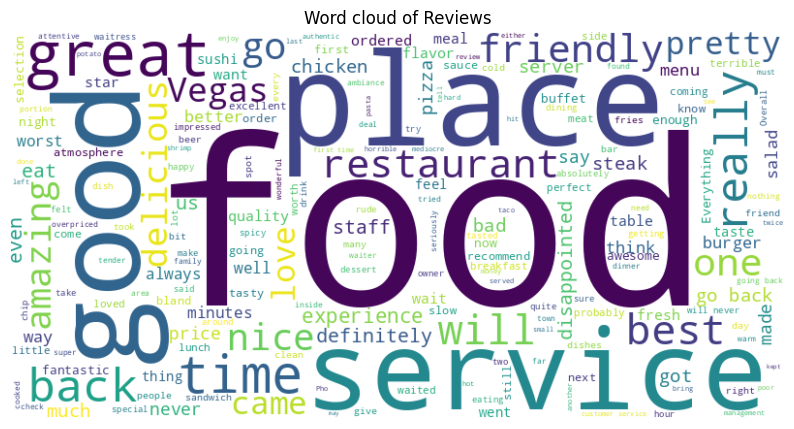

In [9]:
plt.figure(figsize =(10,6))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud of Reviews')
plt.show()

In [10]:
from collections import Counter
targeted_words = ['good','great','amazing','bad','not bad']
all_words = " ".join(data['Review']).lower().split() #flatten reviews into a single list of words
word_counts = Counter(all_words)
target_word_count = {word:word_counts[word] for word in targeted_words}

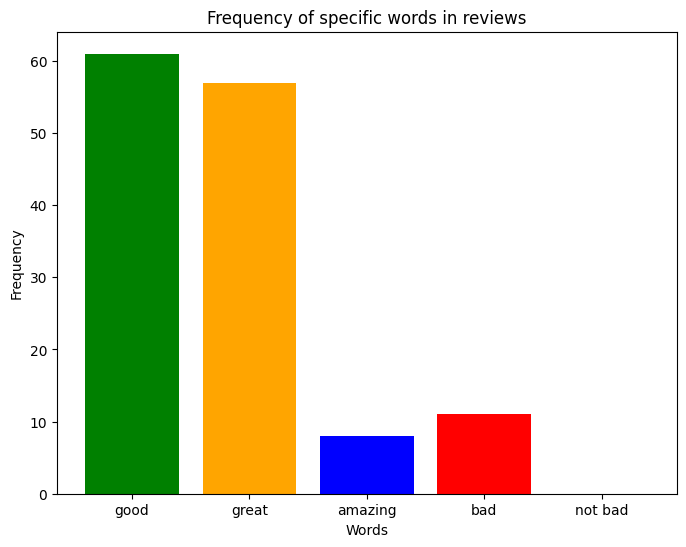

In [11]:
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(),target_word_count.values(),color=['green','orange','blue','red','violet'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of specific words in reviews')
plt.show()

In [12]:
#text preprocessing
# convert a dataset into lowercase
lowercased_text = data['Review'].str.lower()
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [13]:
# st2 : tokenaization (main step ) is a process in which the sentcence is divided into words

from nltk.tokenize import word_tokenize

In [20]:
import nltk
nltk.download('punkt')
data['Tokens'] = data ['Review'].apply(word_tokenize)
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [23]:
import string
data['Review'] = data['Review'].str.replace(f'[{string.punctuation}]'," ",regex=True)
data['Review']

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [24]:
data['Review'].value_counts()

Review
 NAME                                                                                                                                     4
I would not recommend this place                                                                                                          2
I love this place                                                                                                                         2
I won t be back                                                                                                                           2
Will not be back                                                                                                                          2
                                                                                                                                         ..
The burger    I got the  Gold Standard  a  17 burger and was kind of disappointed                                                         1
OMG  the food

In [16]:
#removing stopwords (these,that ,the )
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [17]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

{'while', 'just', 'and', "mightn't", "mustn't", 'my', 'it', 'yours', 'too', 'isn', 'ours', 'we', 'me', 'shouldn', "shan't", 'couldn', 'our', "you've", "needn't", "wouldn't", "it's", 'should', "weren't", 'but', 'd', 'on', 't', 'any', 'there', 'their', 'as', 'can', 'whom', 'were', 'both', 'aren', "aren't", 'shan', 'she', 'over', 'her', 'll', 'is', 'does', 'off', 'have', "hasn't", 'by', 'ma', 'now', 'theirs', 'he', 'don', 'his', 'below', 'in', 'the', 'having', 'or', 'them', 'this', 'further', 'herself', 'where', 'which', 'own', 'again', 're', "that'll", 'ourselves', 'they', 'wasn', 'up', 'of', 'all', 'needn', "haven't", 'doing', 'before', 'to', 'hasn', 'your', "she's", 'had', 'ain', 'most', 'above', "shouldn't", 've', 'between', 'who', 'has', 'few', 'y', 'through', 'himself', 'was', 'because', 'once', "won't", 'than', 'do', 'why', 'down', 'yourself', 'being', 'about', 'each', 'an', 'so', 'from', "should've", 'into', 'did', "couldn't", 'him', "isn't", "didn't", 'mightn', 'itself', 'a', 'wo

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words ])


In [27]:
data

,Review,Liked,Tokens
0,Wow Loved this place,1,"[Wow, Loved, place]"
1,Crust is not good,0,"[Crust, good]"
2,Not tasty and the texture was just nasty,0,"[Not, tasty, texture, nasty]"
3,Stopped by during the late May bank holiday of...,1,"[Stopped, late, May, bank, holiday, Rick, Stev..."
4,The selection on the menu was great and so wer...,1,"[The, selection, menu, great, prices]"
...,...,...,...
995,I think food should have flavor and texture an...,0,"[I, think, food, flavor, texture, lacking]"
996,Appetite instantly gone,0,"[Appetite, instantly, gone]"
997,Overall I was not impressed and would not go b...,0,"[Overall, I, impressed, would, go, back]"
998,The whole experience was underwhelming and I ...,0,"[The, whole, experience, underwhelming, I, thi..."


In [28]:
# stp 3:stemming (root words ) to remove unneccessary other than rootwoord
from nltk. stem import PorterStemmer

In [29]:
stemmer = PorterStemmer()

In [30]:
data['stemmed'] = data['Review'].apply(lambda x: " ".join(stemmer.stem(word)for word in word_tokenize(x)))

In [31]:
print(data['stemmed'])

0                                     wow love thi place
1                                      crust is not good
2                 not tasti and the textur wa just nasti
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                               appetit instantli gone
997        overal i wa not impress and would not go back
998    the whole experi wa underwhelm and i think we ...
999    then as if i hadn t wast enough of my life the...
Name: stemmed, Length: 1000, dtype: object


In [32]:
data['stemmed'].value_counts()


stemmed
name                                                                                                                            4
i would not recommend thi place                                                                                                 2
i love thi place                                                                                                                2
i won t be back                                                                                                                 2
will not be back                                                                                                                2
                                                                                                                               ..
the burger i got the gold standard a 17 burger and wa kind of disappoint                                                        1
omg the food wa delicioso                                                         

In [33]:
#lemmatizastion
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [34]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


In [35]:
lemmatizer = WordNetLemmatizer()

In [39]:
data['lemmatized']= data['Review'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word ,pos = wordnet.VERB) for word in word_tokenize(x)]))
print(data['lemmatized'])

0                                   Wow Loved this place
1                                      Crust be not good
2                Not tasty and the texture be just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                                Appetite instantly go
997       Overall I be not impress and would not go back
998    The whole experience be underwhelming and I th...
999    Then as if I hadn t waste enough of my life th...
Name: lemmatized, Length: 1000, dtype: object


In [40]:
#remove numbers
import re
data['No_Numbers'] = data['Review'].apply(lambda x : re.sub(r'\d+','',x))
print(data['No_Numbers'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [41]:
data['cleaned_text'] = data['Review'].apply(lambda x : re.sub(r'[^A-Za-z0-9\s]','',x))
print(data['cleaned_text'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned_text, Length: 1000, dtype: object


In [42]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        1000 non-null   object
 1   Liked         1000 non-null   int64 
 2   Tokens        1000 non-null   object
 3   stemmed       1000 non-null   object
 4   lemmatized    1000 non-null   object
 5   No_Numbers    1000 non-null   object
 6   cleaned_text  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [46]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.1 MB/s eta 0:00:00


In [48]:
#normalization
import contractions
data['Expaneded'] = data['Review'].apply(contractions.fix)
print(data['Expaneded'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Expaneded, Length: 1000, dtype: object


In [49]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 6.8 MB/s eta 0:00:00


In [50]:
import emoji
data['Emoji']= data['Review'].apply(emoji.demojize)
print (data['Emoji'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Emoji, Length: 1000, dtype: object


In [51]:
#remove HTML tags or l
!pip install beautifulsoup4

In [52]:
from bs4 import BeautifulSoup

In [53]:
data['cleaned']= data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text)
print(data['cleaned'])

0      <bound method PageElement.get_text of Wow    L...
1      <bound method PageElement.get_text of Crust is...
2      <bound method PageElement.get_text of Not tast...
3      <bound method PageElement.get_text of Stopped ...
4      <bound method PageElement.get_text of The sele...
                             ...                        
995    <bound method PageElement.get_text of I think ...
996    <bound method PageElement.get_text of Appetite...
997    <bound method PageElement.get_text of Overall ...
998    <bound method PageElement.get_text of The whol...
999    <bound method PageElement.get_text of Then  as...
Name: cleaned, Length: 1000, dtype: object


In [ ]:
#tf term frequency,idf inverse document frequency

In [54]:
 from sklearn.feature_extraction.text import TfidfVectorizer
 data = [" The sun is brigth ",
         "the sky is blue ",
         "The sun is the brigth",
         "we can see the shining sun, the brigth sun"
         ]


In [55]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data)
print(tfidf_matrix.toarray())
print(tfidf_vectorizer.get_feature_names_out())

[[0.         0.52210862 0.         0.52210862 0.         0.
  0.         0.52210862 0.42685801 0.        ]
 [0.61087812 0.         0.         0.38991559 0.         0.
  0.61087812 0.         0.31878155 0.        ]
 [0.         0.41982529 0.         0.41982529 0.         0.
  0.         0.41982529 0.68646936 0.        ]
 [0.         0.23910199 0.37459947 0.         0.37459947 0.37459947
  0.         0.47820398 0.39096309 0.37459947]]
['blue' 'brigth' 'can' 'is' 'see' 'shining' 'sky' 'sun' 'the' 'we']
